## =======Multithreading and Multiprocessing in Python=======

### Process

**Program :** Program is a sequence of instructions that tells the computer what to do.

**Process :** A process is an instance of a program that is being executed.

Example: When you open a web browser, you are starting a process.


**Code segment**, **Data segment**, **Heap Memory**, **Stack Memory**, **Register Memory** : 
These are the different memory segments that are used in a program.

Example: When you write a program in Python, the code segment is where the instructions are stored. The data segment is where the variables and constants are stored. The heap memory is where the dynamic memory allocation takes place. The stack memory is where the function calls and local variables are stored. The register memory is where the temporary data is stored.

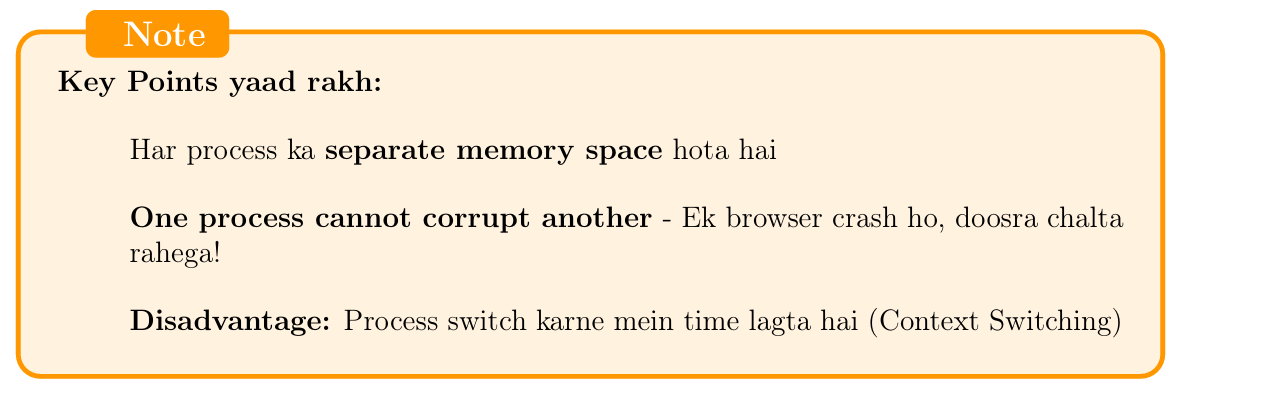

### Thread

**Thread :** Unit of execution within a process.

 A thread is a lightweight process that allows a program to perform multiple tasks concurrently.

**Example:**

 When you open a web browser, you are starting a process. The process has multiple threads, such as the thread that handles the user interface, the thread that handles the network requests, and the thread that handles the rendering of the web pages.

##### =======Thread Vs Process=======

'''
## Thread vs Process

| Feature          | Thread                                  | Process                                              |
|------------------|------------------------------------------|------------------------------------------------------|
| Memory           | Shared                                   | Separate                                             |
| Creation         | Lightweight                              | Heavyweight                                          |
| Communication    | Easy                                     | Complex                                              |
| Crash Impact     | Can affect other threads                 | Isolated, does not affect other processes             |
| Use Cases        | I/O-bound tasks (web scraping, downloads)| CPU-bound tasks (math calculations, image processing)|
'''


### Multithreading

**Multithreading :**

 Multithreading is a technique that allows a program to perform multiple tasks concurrently by dividing the program into multiple threads.

**When should we use multithreading?**

- When the program needs to perform multiple tasks that are I/O-bound, such as web scraping or downloading files.
- When the program needs to perform multiple tasks that are CPU-bound, such as mathematical calculations or image processing.

#### Basic multithreading example

In [ ]:
import threading
import time
# Function 1: Print numbers from 0 to 4 with a delay
def print_numbers():
    for i in range(5):
        time.sleep(2) # Simulating I/O operation.
        print(f"Number : {i}")
# Function 2: Print letters from A to E with a delay
def print_letters():
    for letter in ['A', 'B', 'C', 'D', 'E']:
        time.sleep(2) # Simulating I/O operation.
        print(f"Letter : {letter}")

# Without threading - sequential execution
start_time = time.time()
print_numbers() # Take 10 seconds
print_letters() # Take another 10 seconds
end_time = time.time()
print(f"Total time without threading : {end_time - start_time} seconds")


Number : 0
Number : 1
Number : 2
Number : 3
Number : 4
Letter : A
Letter : B
Letter : C
Letter : D
Letter : E
Total time without threading : 20.009618043899536 seconds


#### With Multithreading- parallel execution

In [11]:
import threading
import time

def print_numbers():
    for i in range(5):
        time.sleep(2) # Simulating I/O operation.
        print(f"Number : {i}")
def print_letters():
    for letter in ['A', 'B', 'C', 'D', 'E']:
        time.sleep(2) # Simulating I/O operation.
        print(f"Letter : {letter}")
# Create threads for each function
thread1 = threading.Thread(target=print_numbers)
thread2 = threading.Thread(target=print_letters)
# Start the timer
start_time = time.time()
# Start the threads
thread1.start()
thread2.start()
# Wait for both threads to complete
thread1.join()
thread2.join()
# Stop the timer
end_time = time.time()
print(f"Total time with threading : {end_time - start_time} seconds")

Number : 0
Letter : A
Number : 1
Letter : B
Number : 2
Letter : C
Number : 3
Letter : D
Number : 4
Letter : E
Total time with threading : 10.009830236434937 seconds


**Threading Code – DRY RUN FLOW DIAGRAM (Parallel)**

```python

TIME ↓

+----------------------- MAIN THREAD -----------------------+
|                                                           |
|  Start                                                    |
|    |                                                      |
|    v                                                      |
|  Define Functions                                         |
|  (print_numbers, print_letters)                           |
|    |                                                      |
|    v                                                      |
|  Create Threads                                           |
|  thread1 -> print_numbers()                               |
|  thread2 -> print_letters()                               |
|    |                                                      |
|    v                                                      |
|  start_time = time.time()                                 |
|    |                                                      |
|    v                                                      |
|  thread1.start()        thread2.start()                   |
|        |                     |                            |
|        |                     |                            |
|        v                     v                            |
|  +---------------+     +---------------+                  |
|  |   THREAD 1    |     |   THREAD 2    |                  |
|  | print_numbers |     | print_letters |                  |
|  +---------------+     +---------------+                  |
|  | sleep(2)      |     | sleep(2)      |                  |
|  | Number : 0    |     | Letter : A    |                  |
|  | sleep(2)      |     | sleep(2)      |                  |
|  | Number : 1    |     | Letter : B    |                  |
|  | sleep(2)      |     | sleep(2)      |                  |
|  | Number : 2    |     | Letter : C    |                  |
|  | sleep(2)      |     | sleep(2)      |                  |
|  | Number : 3    |     | Letter : D    |                  |
|  | sleep(2)      |     | sleep(2)      |                  |
|  | Number : 4    |     | Letter : E    |                  |
|  +---------------+     +---------------+                  |
|        |                     |                            |
|        +----------+----------+                            |
|                   v                                       |
|            join() - Main Thread waits                     |
|                   |                                       |
|                   v                                       |
|            end_time = time.time()                         |
|                   |                                       |
|                   v                                       |
|         Print Total Time (~10 seconds)                    |
|                   |                                       |
|                   v                                       |
|                  END                                      |
|                                                           |
+-----------------------------------------------------------+

```

### Multiprocessing

**When to use multiprocessing?**

When you have a CPU-bound task that can be parallelized, meaning it can be divided into multiple independent subtasks that can be executed simultaneously on different CPU cores.

**Example:** Image processing, video encoding, or any task that requires heavy computational processing.

#### Basic Multiprocessing Example

**Note**: The code for this is separately available in the `Multiprocessing.py` file.

The reason for this is, these type of code when we try to run in jupyter notebook it will show the wrong output.

These type of code should always run in .py file


**Note:**
 In Jupyter Notebook, threading works fine because threads run in the same process.

Multiprocessing creates new processes, which Jupyter cannot handle properly.

On Windows, multiprocessing needs the __main__ block to start safely.
Because of this, time and output in Jupyter may be wrong.

Multiprocessing works best when run in a .py file.


### ThreadPoolExecutor

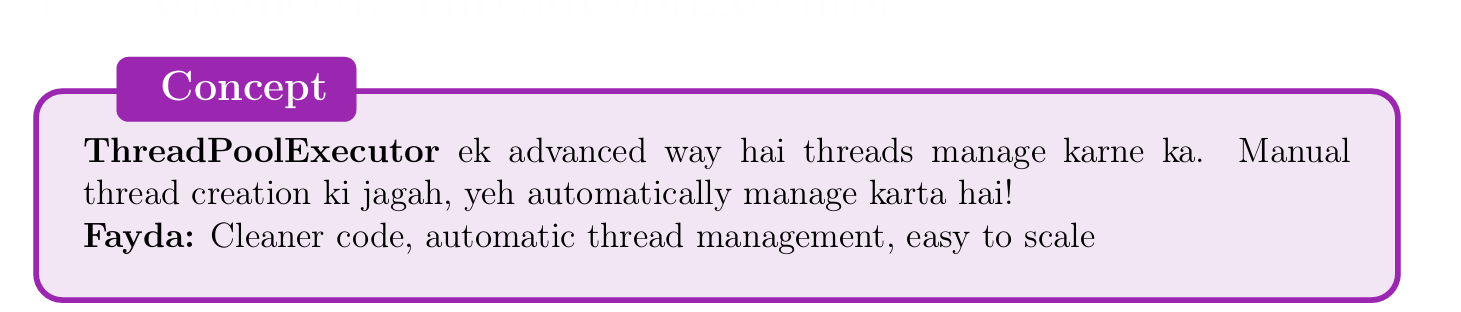

In [34]:
from concurrent.futures import ThreadPoolExecutor
import time

def print_number(number):
    time.sleep(1)  # Simulating I/O operation.
    return f"Number: {number}"

numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Using ThreadPoolExecutor to manage threads
with ThreadPoolExecutor(max_workers=3) as executor:
    # Map function to the list of numbers
    results = executor.map(print_number, numbers)

    for result in results:
        print(result)

Number: 1
Number: 2
Number: 3
Number: 4
Number: 5
Number: 6
Number: 7
Number: 8
Number: 9
Number: 10


### Real World Example : Web Scraping with Multithreading

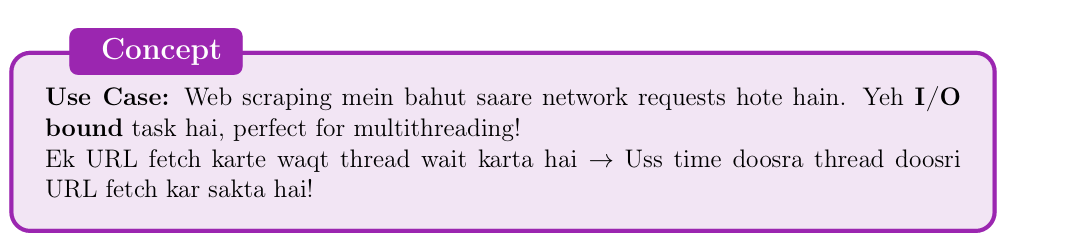

##### Refer to Web_scraping_threading.py

In [35]:
import os
print(os.cpu_count())


12


**12 logical CPU cores in my pc**

### =====Final Summary=====
```python
┌───────────────────────────────────────────────┐
│              MULTITHREADING                   │
├───────────────────────────────────────────────┤
│                I/O Bound Tasks                │
│                                               │
│  • File Read / Write                          │
│  • Network Requests                           │
│  • Web Scraping                               │
│  • Database Queries                           │
│                                               │
│  Shared Memory                                │
│  Lightweight                                  │
└───────────────────────────────────────────────┘


┌───────────────────────────────────────────────┐
│             MULTIPROCESSING                   │
├───────────────────────────────────────────────┤
│               CPU Bound Tasks                 │
│                                               │
│  • Math Calculations                          │
│  • Data Processing                            │
│  • Image Processing                           │
│  • ML Model Training                          │
│                                               │
│  Separate Memory                              │
│  Heavyweight                                  │
└───────────────────────────────────────────────┘


┌─────────────────────────────────────────────────────────┐
│                        SUMMARY                          │
├─────────────────────────────────────────────────────────┤
│  Quick Decision Guide:                                  │
│                                                         │
│  Waiting for something?                                 │
│  (API, File, Network)  →  MULTITHREADING                │
│                                                         │
│  Heavy Calculation?                                     │
│  (Math, Data, ML)     →  MULTIPROCESSING                │
└─────────────────────────────────────────────────────────┘


```